In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange

In [2]:
train_data = fetch_20newsgroups_vectorized(
    subset="train", normalize=False, data_home="20newsgrups"
)
test_data = fetch_20newsgroups_vectorized(
    subset="test", normalize=False, data_home="20newsgrups"
)

In [3]:
print(f"文章主题:{train_data.target_names}")

文章主题:['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


| 英文主题                            | 中文翻译        |
|------------------------------------|----------------|
| alt.atheism                        | 无神论          |
| comp.graphics                       | 计算机图形学    |
| comp.os.ms-windows.misc             | 计算机操作系统：MS Windows杂项 |
| comp.sys.ibm.pc.hardware            | IBM PC硬件      |
| comp.sys.mac.hardware               | Mac硬件        |
| comp.windows.x                      | Windows X（可能指的是X Window系统） |
| misc.forsale                        | 杂项出售        |
| rec.autos                           | 汽车            |
| rec.motorcycles                     | 摩托车          |
| rec.sport.baseball                  | 棒球            |
| rec.sport.hockey                    | 曲棍球          |
| sci.crypt                           | 密码学          |
| sci.electronics                     | 电子学          |
| sci.med                             | 医学            |
| sci.space                           | 空间科学        |
| soc.religion.christian              | 基督教          |
| talk.politics.guns                  | 枪支政治        |
| talk.politics.mideast               | 中东政治        |
| talk.politics.misc                  | 政治杂项        |
| talk.religion.misc                  | 宗教杂项        |

In [4]:
# 第一篇文章的单词在全局中的词频
for num in train_data.data[0].toarray()[0]:
    print(num, end=" ")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [5]:
# 第一篇文章的单词在自身中的词频
train_data.data[0].data

array([ 4,  2,  2,  2,  3,  3,  1,  3,  6,  1,  2, 16,  6,  2,  1, 10,  1,
        3,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  1,  1,  1,  8,  2,  1,
        1,  5,  1,  1,  3,  1,  1,  3,  1,  2,  1,  1,  3,  1,  1,  1,  1,
        1,  1,  1,  1, 24,  1,  1,  3, 31,  1,  1,  1,  1, 23,  1,  5,  1,
        1,  2,  4,  1,  1,  3,  1,  2,  1,  1,  1,  2,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  4,  2,  2,  1,  1,
        5,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  2,  2,  2,  1,  1,  1,  3,  3,  1,  2,  1,
        1,  1,  1,  1,  1,  4,  1,  1,  1,  1,  1,  8,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  4,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  2,  2,
        1,  1,  1,  3,  1

In [6]:
print(train_data.data[0].toarray().shape)

(1, 130107)


In [7]:
cat_cnt = np.bincount(train_data.target)

In [8]:
pd.DataFrame(
    {
        "主题": train_data.target_names,
        "文章数量": cat_cnt,
    }
)

,主题,文章数量
0,alt.atheism,480
1,comp.graphics,584
2,comp.os.ms-windows.misc,591
3,comp.sys.ibm.pc.hardware,590
4,comp.sys.mac.hardware,578
5,comp.windows.x,593
6,misc.forsale,585
7,rec.autos,594
8,rec.motorcycles,598
9,rec.sport.baseball,597


In [9]:
log_cat_freq = np.log(cat_cnt / np.sum(cat_cnt))

In [10]:
pd.DataFrame(
    {
        "文章数量": cat_cnt,
        "对数": log_cat_freq,
    },
    index=train_data.target_names,
)

,文章数量,对数
alt.atheism,480,-3.160010
comp.graphics,584,-2.963895
comp.os.ms-windows.misc,591,-2.951980
comp.sys.ibm.pc.hardware,590,-2.953674
comp.sys.mac.hardware,578,-2.974222
comp.windows.x,593,-2.948602
misc.forsale,585,-2.962184
rec.autos,594,-2.946917
rec.motorcycles,598,-2.940205
rec.sport.baseball,597,-2.941879


In [11]:
alpha = 1

In [12]:
log_voc_freq = np.zeros((20, len(train_data.feature_names))) + alpha

In [13]:
log_voc_freq

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [14]:
np.array(
    [
        [0, 1],
        [2, 3],
    ]
).sum(axis=0)

array([2, 4])

In [15]:
voc_cnt = np.zeros(20) + len(train_data.feature_names) * alpha

In [16]:
voc_cnt

array([130107., 130107., 130107., 130107., 130107., 130107., 130107.,
       130107., 130107., 130107., 130107., 130107., 130107., 130107.,
       130107., 130107., 130107., 130107., 130107., 130107.])

In [17]:
for index in trange(len(train_data.target_names)):
    rows = np.where(train_data.target == index)[0]

    data = np.sum(train_data.data[rows].toarray(), axis=0)
    log_voc_freq[index] += data
    voc_cnt[index] += data.sum()

100%|██████████| 20/20 [00:00<00:00, 23.25it/s]


In [18]:
print(f"词频统计情况:\n{voc_cnt}")

词频统计情况:
[294085. 262200. 411164. 251344. 237672. 306854. 215000. 264848. 254163.
 261748. 303495. 357328. 254008. 307114. 308860. 348108. 331289. 406490.
 334072. 261971.]


In [19]:
print(f"词频统计情况:\n{log_voc_freq}")

词频统计情况:
[[  4.  35.   1. ...   1.   1.   1.]
 [ 35.  18.   1. ...   1.   1.   1.]
 [ 34.  11.   1. ...   1.   1.   1.]
 ...
 [ 34. 207.   2. ...   1.   1.   1.]
 [ 29.  71.   1. ...   1.   1.   1.]
 [  5.  18.   1. ...   1.   1.   1.]]


In [20]:
log_voc_freq = np.log(log_voc_freq / voc_cnt.reshape(-1, 1))

In [21]:
print(f"词语在自身文章中出现的概率矩阵为:\n{log_voc_freq}")

词语在自身文章中出现的概率矩阵为:
[[-11.20532976  -9.03627606 -12.59162412 ... -12.59162412 -12.59162412
  -12.59162412]
 [ -8.92151479  -9.58649109 -12.47686285 ... -12.47686285 -12.47686285
  -12.47686285]
 [ -9.40038692 -10.52885217 -12.92674744 ... -12.92674744 -12.92674744
  -12.92674744]
 ...
 [ -9.38895408  -7.58259581 -12.22216743 ... -12.91531461 -12.91531461
  -12.91531461]
 [ -9.35181599  -8.45643194 -12.71911182 ... -12.71911182 -12.71911182
  -12.71911182]
 [-10.86655118  -9.58561733 -12.47598909 ... -12.47598909 -12.47598909
  -12.47598909]]


In [22]:
def predict(data):
    data = np.where(data != 0, 1, 0)
    return np.argmax(data @ log_voc_freq.T + log_cat_freq)

In [23]:
np.where(
    np.array(
        [
            [1, 2],
            [3, 4],
        ]
    )
    > 1,
    0,
    1,
)

array([[1, 0],
       [0, 0]])

In [24]:
preds = []

for index, news in enumerate(test_data.data):
    pred = predict(news.toarray())
    preds.append(pred)
    label = test_data.target[index]

In [25]:
pd.DataFrame(
    {
        "预测": preds,
        "真实": test_data.target,
    }
)

,预测,真实
0,11,2
1,0,0
2,11,11
3,16,10
4,10,10
...,...,...
7527,16,18
7528,16,16
7529,10,10
7530,16,18


In [26]:
ac = accuracy_score(test_data.target, preds)
cm = confusion_matrix(test_data.target, preds)
cr = classification_report(test_data.target, preds)

In [27]:
print(f"准确率:{ac:.2f}")

准确率:0.78


In [28]:
def plot(matrix):
    fig, ax = plt.subplots(figsize=(20, 20))  # 设置画布大小
    plt.tight_layout()
    sns.heatmap(matrix, annot=True, cmap="Blues", ax=ax)  # 画热力图
    ax.set_title("cm")  # 标题
    ax.set_xlabel("predict")  # x轴
    ax.set_ylabel("label")  # y轴

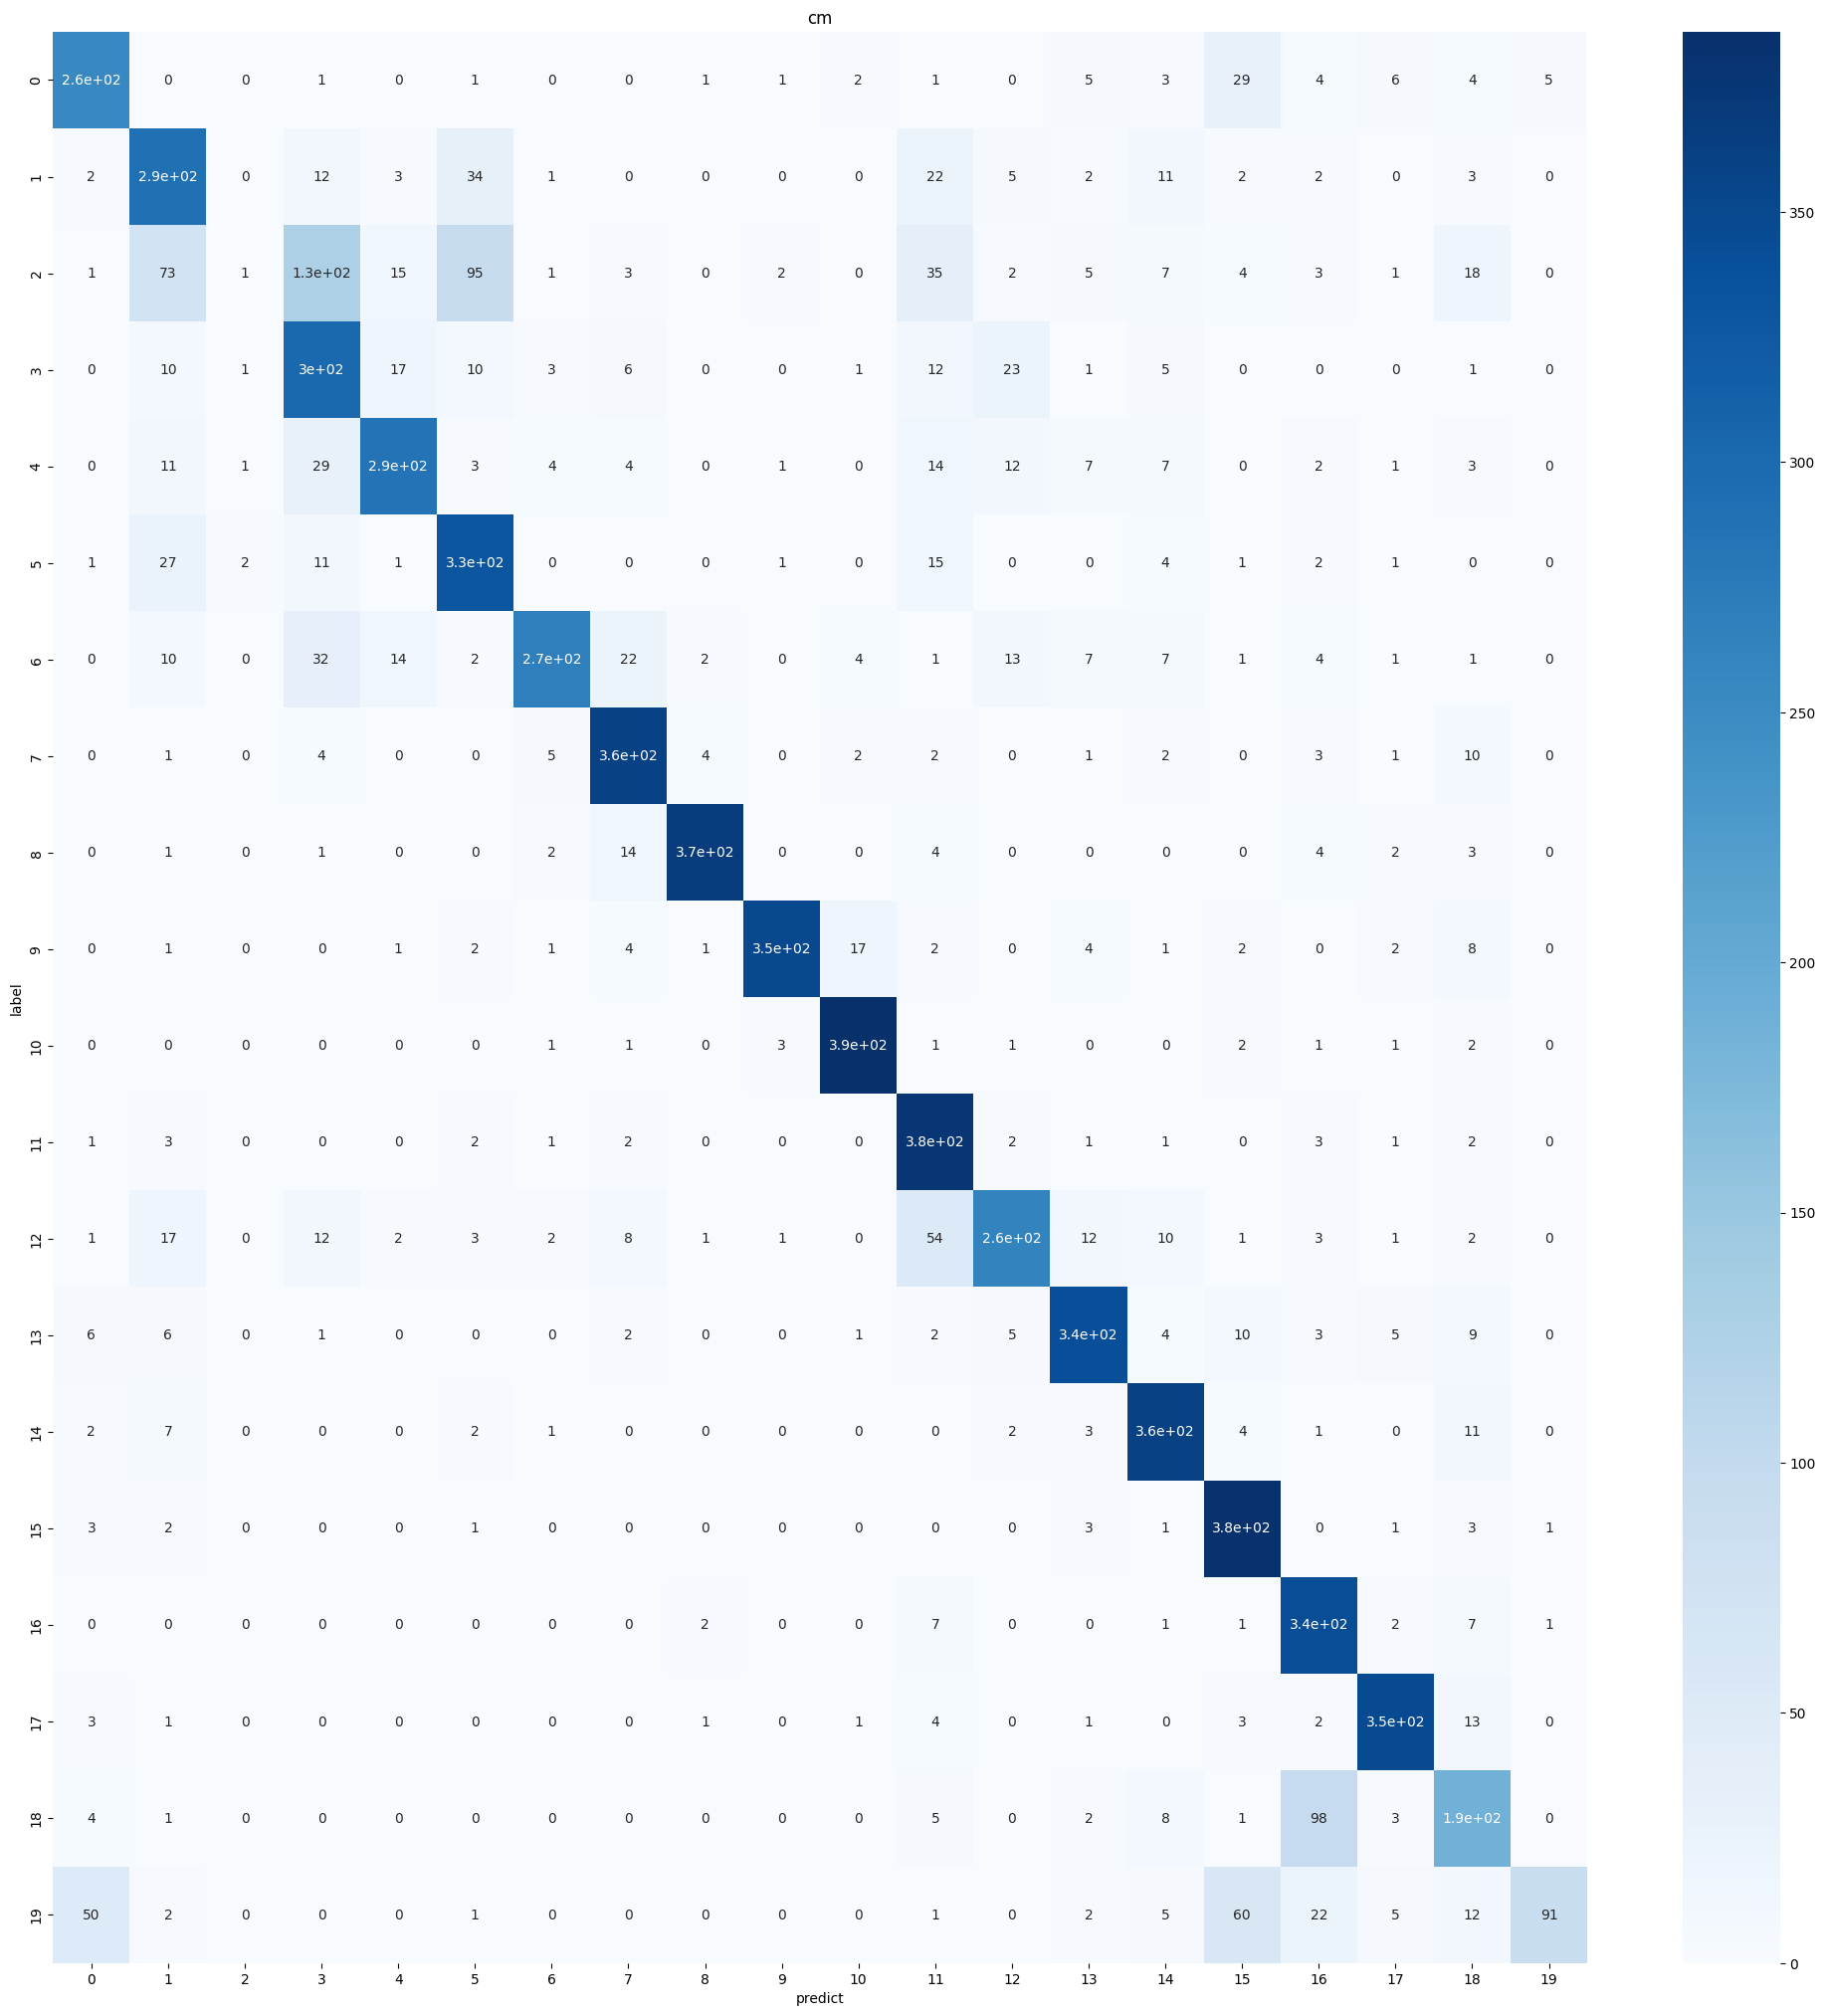

In [29]:
plot(cm)

In [30]:
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       319
           1       0.63      0.75      0.68       389
           2       0.20      0.00      0.01       394
           3       0.57      0.77      0.65       392
           4       0.84      0.74      0.79       385
           5       0.68      0.83      0.75       395
           6       0.92      0.69      0.79       390
           7       0.85      0.91      0.88       396
           8       0.97      0.92      0.94       398
           9       0.97      0.88      0.93       397
          10       0.93      0.97      0.95       399
          11       0.67      0.95      0.79       396
          12       0.80      0.67      0.73       393
          13       0.86      0.86      0.86       396
          14       0.82      0.92      0.87       394
          15       0.76      0.96      0.85       398
          16       0.69      0.94      0.79       364
          17       0.91    